In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,  classification_report

In [177]:
prob2 = pd.read_csv('Problem 2—wine dataset (1).csv')
prob2.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,is_red,high_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0


In [178]:
prob2.shape

(6497, 15)

array([[<AxesSubplot:title={'center':'fixed_acidity'}>,
        <AxesSubplot:title={'center':'volatile_acidity'}>,
        <AxesSubplot:title={'center':'citric_acid'}>,
        <AxesSubplot:title={'center':'residual_sugar'}>],
       [<AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free_sulfur_dioxide'}>,
        <AxesSubplot:title={'center':'total_sulfur_dioxide'}>,
        <AxesSubplot:title={'center':'density'}>],
       [<AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>],
       [<AxesSubplot:title={'center':'is_red'}>,
        <AxesSubplot:title={'center':'high_quality'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

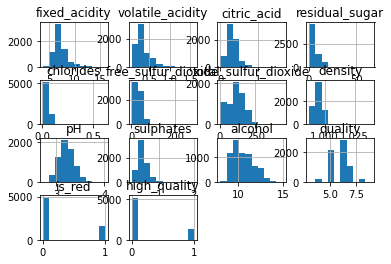

In [179]:
prob2.describe()
prob2.hist()

In [180]:
X = prob2.drop(['high_quality','color'], axis =1)

In [181]:
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0.0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0.0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0.0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0.0


In [182]:
y = prob2['high_quality']
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
6492    0.0
6493    0.0
6494    0.0
6495    1.0
6496    0.0
Name: high_quality, Length: 6497, dtype: float64

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state=10)

In [184]:
k_neighbors= np.arange(1,11)
train_accuracy = np.empty(10)
test_accuracy = np.empty(10)

for i, k in enumerate(k_neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train, y_train)
    
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

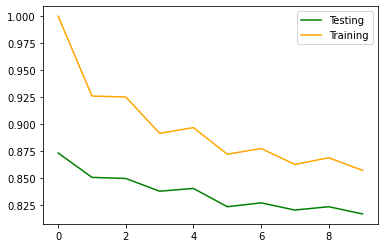

In [185]:
plt.plot(test_accuracy, color='green', label='Testing')
plt.plot(train_accuracy, color='orange', label='Training')
plt.legend()

In [186]:
knn= KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.8235897435897436

In [187]:
preds= knn.predict(X_test)
confusion_matrix(y_test, preds)

array([[1502,   52],
       [ 292,  104]], dtype=int64)

In [188]:
X = prob1.drop(['high_quality','color','is_red'], axis =1)

In [189]:
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [190]:
y = prob1['is_red']
y

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
6492    0.0
6493    0.0
6494    0.0
6495    0.0
6496    0.0
Name: is_red, Length: 6497, dtype: float64

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state=100)

In [192]:
k_neighbors= np.arange(1,8)
train_accuracy = np.empty(8)
test_accuracy = np.empty(8)

for i, k in enumerate(k_neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train, y_train)
    
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

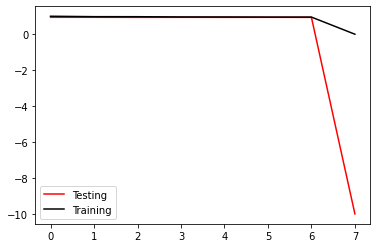

In [193]:
plt.plot(test_accuracy, color='red', label='Testing')
plt.plot(train_accuracy, color='black', label='Training')
plt.legend()

In [194]:
knn= KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9405128205128205

In [195]:
preds= knn.predict(X_test)
confusion_matrix(y_test, preds)

array([[1438,   29],
       [  87,  396]], dtype=int64)

In [196]:
X = prob1.drop(['high_quality','color','is_red'], axis =1)

In [197]:
y = prob1['is_red']
y

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
6492    0.0
6493    0.0
6494    0.0
6495    0.0
6496    0.0
Name: is_red, Length: 6497, dtype: float64

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state=100)
k_neighbors= np.arange(1,8)
train_accuracy = np.empty(8)
test_accuracy = np.empty(8)
for i, k in enumerate(k_neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train, y_train)
    
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)


In [199]:
lreg = LogisticRegression()
lreg.fit(X_train, y_train)
lreg.score(X_test, y_test)



A:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.977948717948718

In [200]:
preds = lreg.predict(X_test)
confusion_matrix(y_test, preds)

array([[1447,   20],
       [  23,  460]], dtype=int64)

In [201]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1467
         1.0       0.96      0.95      0.96       483

    accuracy                           0.98      1950
   macro avg       0.97      0.97      0.97      1950
weighted avg       0.98      0.98      0.98      1950



In [202]:
prob1 = pd.read_csv('Problem1.csv')
prob1.head()

,S.No.,num_words,num_characters,num_misspelled,bin_end_qmark,num_interrogative,bin_start_small,num_sentences,num_punctuations,label
0,1,10,48,2,0,0,0,2,4,B
1,2,8,25,0,0,0,1,1,0,B
2,3,20,81,0,1,19,0,1,1,B
3,4,9,34,1,0,1,0,1,2,B
4,5,18,69,3,0,1,0,1,0,B


In [203]:
prob1.shape

(28, 10)

In [204]:
prob1.describe()

,S.No.,num_words,num_characters,num_misspelled,bin_end_qmark,num_interrogative,bin_start_small,num_sentences,num_punctuations
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,257.500000,26.285714,120.500000,3.035714,0.142857,1.392857,0.142857,2.571429,5.392857
std,254.620633,34.332640,162.859744,5.620611,0.356348,3.520725,0.356348,2.936722,9.897023
min,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,7.750000,9.000000,43.250000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,257.500000,13.500000,62.500000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
75%,507.250000,26.500000,119.500000,4.000000,0.000000,1.000000,0.000000,2.000000,6.250000
max,514.000000,169.000000,831.000000,26.000000,1.000000,19.000000,1.000000,13.000000,48.000000


In [205]:
X = prob1.drop(['label', 'num_sentences'], axis =1)

In [206]:
y = prob1['num_sentences']
y

0      2
1      1
2      1
3      1
4      1
5      1
6      2
7      2
8      1
9      3
10     2
11     1
12     2
13     1
14     9
15     1
16    13
17     4
18     1
19     2
20     6
21     1
22     2
23     1
24     8
25     1
26     1
27     1
Name: num_sentences, dtype: int64

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state=10)

In [208]:
k_neighbors= np.arange(1,11)
train_accuracy = np.empty(10)
test_accuracy = np.empty(10)

for i, k in enumerate(k_neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train, y_train)
    
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

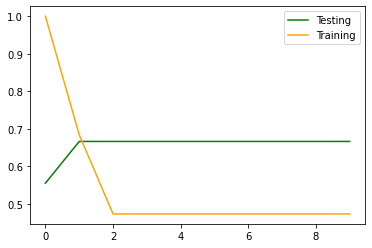

In [209]:
plt.plot(test_accuracy, color='green', label='Testing')
plt.plot(train_accuracy, color='orange', label='Training')
plt.legend()

In [210]:
knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.5555555555555556

In [211]:
preds= knn.predict(X_test)
confusion_matrix(y_test, preds)

array([[4, 2],
       [2, 1]], dtype=int64)